# Keras tutorial - Emotion Detection in Images of Faces

Learn to use Keras, a high-level neural networks API (programming framework), written in Python and capable of running on top of several lower-level frameworks including TensorFlow and CNTK. 

#### Why are we using Keras? 

* Keras was developed to enable deep learning engineers to build and experiment with different models very quickly. 
* Just as TensorFlow is a higher-level framework than Python, Keras is an even higher-level framework and provides additional abstractions. 
* Being able to go from idea to result with the least possible delay is key to finding good models. 
* However, Keras is more restrictive than the lower-level frameworks, so there are some very complex models that you would still implement in TensorFlow rather than in Keras. 
* That being said, Keras will work fine for many common models. 

## Load packages
* Work on the "Emotion detection" model, which we'll explain below. 
* Let's load the required packages.

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


**Note**: As you can see, we've imported a lot of functions from Keras. You can use them by calling them directly in your code. Ex: `X = Input(...)` or `X = ZeroPadding2D(...)`. 

In other words, unlike TensorFlow, you don't have to create the graph and then make a separate `sess.run()` call to evaluate those variables.

## 1 - Emotion Tracking

* A nearby community health clinic is helping the local residents monitor their mental health.  
* As part of their study, they are asking volunteers to record their emotions throughout the day.
* To help the participants more easily track their emotions, you are asked to create an app that will classify their emotions based on some pictures that the volunteers will take of their facial expressions.
* As a proof-of-concept, you first train your model to detect if someone's emotion is classified as "happy" or "not happy."

To build and train this model, you have gathered pictures of some volunteers in a nearby neighborhood. The dataset is labeled.
<img src="images/face_images.png" style="width:550px;height:250px;">

Run the following code to normalize the dataset and learn about its shapes.

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


**Details of the "Face" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures

## 2 - Building a model in Keras

Keras is very good for rapid prototyping. In just a short time you will be able to build a model that achieves outstanding results.

Implement a `HappyModel()`.  
* This assignment is more open-ended than most. 
* Start by implementing a model using the architecture we suggest, and run through the rest of this assignment using that as your initial model. * Later, come back and try out other model architectures. 
* For example, you might take inspiration from the model above, but then vary the network architecture and hyperparameters however you wish. 
* You can also use other functions such as `AveragePooling2D()`, `GlobalMaxPooling2D()`, `Dropout()`. 

In [5]:
def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]
    

    Returns:
    model -- a Model() instance in Keras
    """
    
    ### START CODE HERE ###
    # Feel free to use the suggested outline in the text above to get started, and run through the whole
    # exercise (including the later portions of this notebook) once. The come back also try out other
    # network architectures as well. 
    
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    ### END CODE HERE ###
    
    return model

#### Step 1: create the model.  

In [10]:
### START CODE HERE ### (1 line)
happyModel = HappyModel(X_train.shape[1:])
### END CODE HERE ###

#### Step 2: compile the model

In [11]:
### START CODE HERE ### (1 line)
happyModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
### END CODE HERE ###

#### Step 3: train the model

In [12]:
### START CODE HERE ### (1 line)
happyModel.fit(X_train, Y_train, epochs=40, batch_size=50)
### END CODE HERE ###

Epoch 1/40
600/600 [==============================] - 13s - loss: 1.5194 - acc: 0.5933    
Epoch 2/40
600/600 [==============================] - 13s - loss: 0.3856 - acc: 0.8083    
Epoch 3/40
600/600 [==============================] - 13s - loss: 0.2028 - acc: 0.9167    
Epoch 4/40
600/600 [==============================] - 13s - loss: 0.1588 - acc: 0.9417    
Epoch 5/40
600/600 [==============================] - 13s - loss: 0.1180 - acc: 0.9633    
Epoch 6/40
600/600 [==============================] - 13s - loss: 0.0960 - acc: 0.9767    
Epoch 7/40
600/600 [==============================] - 13s - loss: 0.0828 - acc: 0.9750    
Epoch 8/40
600/600 [==============================] - 13s - loss: 0.0722 - acc: 0.9833    
Epoch 9/40
600/600 [==============================] - 13s - loss: 0.0738 - acc: 0.9800    
Epoch 10/40
600/600 [==============================] - 13s - loss: 0.0676 - acc: 0.9817    
Epoch 11/40
600/600 [==============================] - 13s - loss: 0.0562 - acc: 0.9817  

#### Step 4: evaluate model  

In [13]:
### START CODE HERE ### (1 line)
preds = happyModel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s     

Loss = 0.106548328201
Test Accuracy = 0.966666664282


## 3 - Conclusion

Created a proof of concept for "happiness detection"!

## 4 - Other useful functions in Keras

Two other basic features of Keras that you'll find useful are:
- `model.summary()`: prints the details of your layers in a table with the sizes of its inputs/outputs
- `plot_model()`: plots your graph in a nice layout. You can even save it as ".png" using SVG() if you'd like to share it on social media ;). It is saved in "File" then "Open..." in the upper bar of the notebook.

Run the following code.

In [14]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

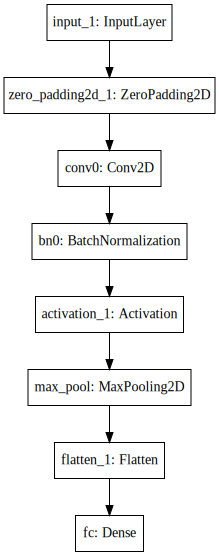

In [15]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))